In [41]:
import Quandl as qdl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [42]:
stock_one = 'GOOG/NASDAQ_AAPL'
stock_two = 'GOOG/NYSE_BRK_A'
stock_three = 'GOOG/NYSE_DAC'
start_date = '2007-01-01'

pull data from quandl

In [43]:
data_one = qdl.get(stock_one)
data_two = qdl.get(stock_two)
data_three = qdl.get(stock_three)

only keep closing prices after 1/1/2007

In [44]:
data_one = data_one.loc[start_date:, 'Close']
data_two = data_two.loc[start_date:, 'Close']
data_three = data_three.loc[start_date:, 'Close']

calculate one day percent change and drop NAs

In [45]:
data_one_chg = data_one.pct_change().dropna()
data_two_chg = data_two.pct_change().dropna()
data_three_chg = data_three.pct_change().dropna()

### Calculating VAR using Simulation

run simulations. each loop is a single simulation. for each loop, draw one daily return observation from each of the three assets, then average the three daily returns to get the portfolio return for the day, and save the portfolio return in the "simulations" list. this process assumes returns aren't correlated across stocks and that an equal amount is invested in each asset.

In [46]:
simulations = []
num_sim = 10000
for _ in range(num_sim):
    sim_one = np.random.choice(data_one_chg, size = 1)
    sim_two = np.random.choice(data_two_chg, size = 1)
    sim_three = np.random.choice(data_three_chg, size = 1)
    sim_portfolio = np.mean([sim_one, sim_two, sim_three])
    simulations.append(sim_portfolio)

calculate and print five and ninety-five percentiles

In [47]:
five_percentile = np.percentile(simulations, 5)
ninety_five_percentile = np.percentile(simulations, 95)
print(five_percentile, ninety_five_percentile)

(-0.022531783695969018, 0.024510469741492794)


calculate and print min and max daily return

In [48]:
print(np.min(simulations), np.max(simulations))

(-0.098136244964117256, 0.12221546788199)


graph histogram of daily portfolio returns along with the five percentile value (horizontal line)

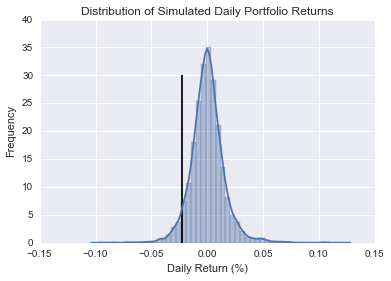

In [49]:
ax = sns.distplot(simulations)
ax.vlines(five_percentile, 0, 30)
ax.set_xlabel('Daily Return (%)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Simulated Daily Portfolio Returns')

### Calculating VAR using Historical Distribution of Data 

In [50]:
all_data = pd.concat([data_one_chg, data_two_chg, data_three_chg], axis=1)

In [51]:
historical_port_return = all_data.mean(axis=1)
historical_five_percentile = np.percentile(historical_port_return, 5)
historical_ninety_five_percentile = np.percentile(simulations, 95)
print(historical_five_percentile, historical_ninety_five_percentile)

(-0.026742563093176908, 0.024510469741492794)


In [52]:
print(np.min(historical_port_return), np.max(historical_port_return))

(-0.12489814198646691, 0.14489231984725848)


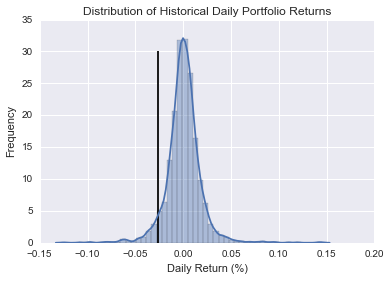

In [53]:
ax = sns.distplot(historical_port_return)
ax.vlines(historical_five_percentile, 0, 30)
ax.set_xlabel('Daily Return (%)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Historical Daily Portfolio Returns')